# GPR Figure

=> The data is calculated in the notebook `GPR-create-data.ipynb`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Style adjustments
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['text.usetex'] = True  # Comment this if you don't have LaTeX. You might have to adjust some strings.
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.style'] = 'normal'

## Load data

In [2]:
# 1. DLF
gprDLF = np.load('data/GPR-DLF.npy')

# 2. QUA
gprQUA = np.load('data/GPR-QUA.npy')

# 3. Arrival times
x = np.load('data/ArrivalTimes.npz')['x']
arrtime = np.load('data/ArrivalTimes.npz')['arrtime']
arrtimeref = np.load('data/ArrivalTimes.npz')['arrtimeref']
arrtimerefair = np.load('data/ArrivalTimes.npz')['arrtimerefair']

## Calculate RPD

In [3]:
floor = 0.01                                  # Floor level 1 %
vmax = np.abs(gprQUA).max()                   # absolute maximum of response
gprmax = np.maximum.reduce([gprQUA, gprDLF])  # max-matrix
rpd = np.where(np.abs(gprmax) < vmax*floor, np.nan, np.log10(np.abs((gprDLF-gprQUA)/gprmax))) # RPD

## Plot

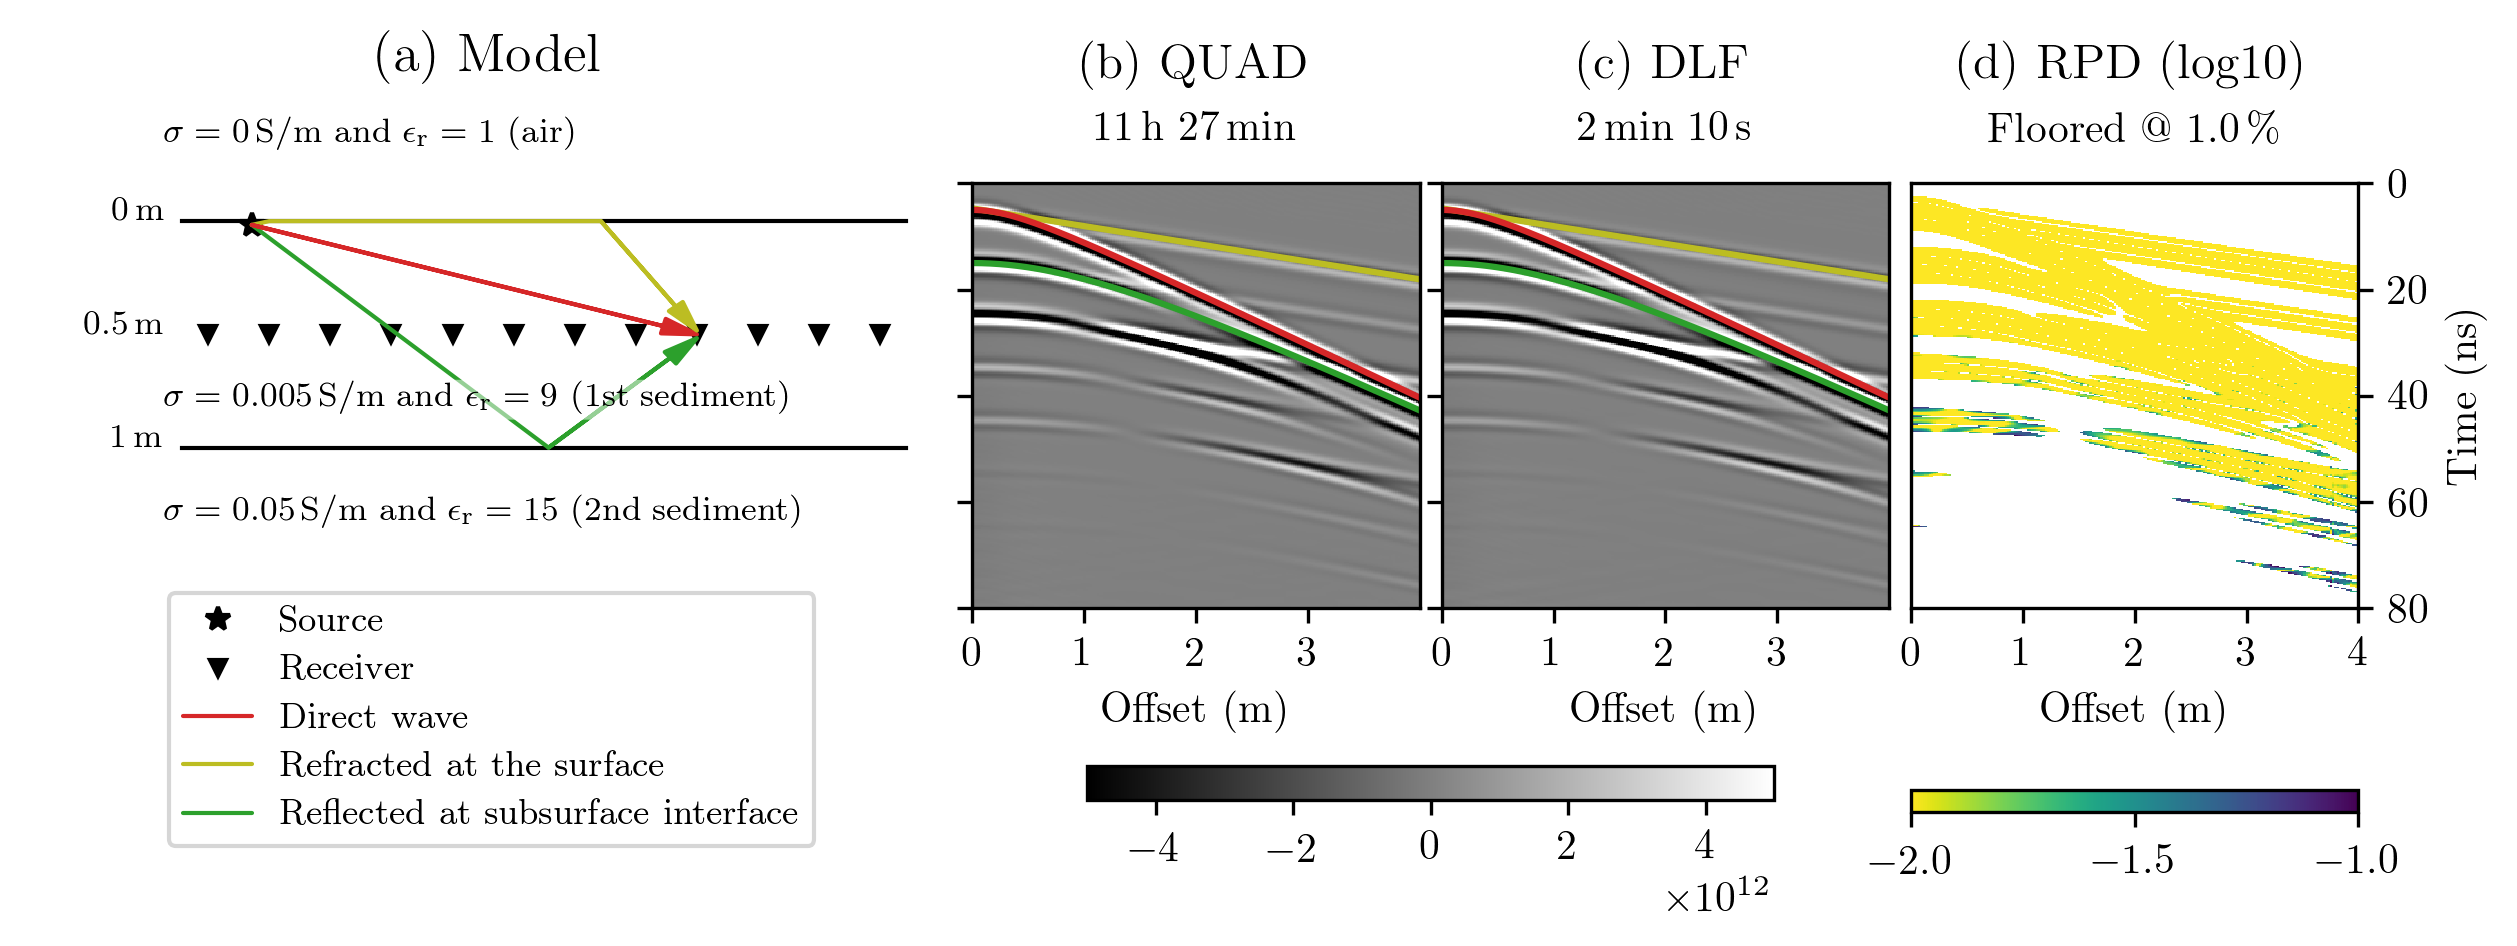

In [4]:
fig, axs = plt.subplots(figsize=(10, 2.5), facecolor = 'w', nrows=1, ncols=5)
fig.subplots_adjust(wspace=.05)
axs = axs.ravel() 

# # 1. Plot model # #
plt.subplot2grid((1, 5), (0, 0), colspan=2)
ax = plt.gca()
plt.text(0.5, 1.2, r'(a) Model', transform=ax.transAxes, horizontalalignment='center', fontsize=13)

# Some settings
arrow_prop = {'length_includes_head': True, 'zorder': 5, 'joinstyle': 'round',
              'capstyle': 'round', 'head_width': 0.2, 'head_length': 0.4}
x1 = 1
x0 = 1.2
y0 = 2
y1 = 3.5
y2 = 5

# Plot first interface
plt.plot([x0, 9.5], [y0, y0], 'k', lw=1)
plt.plot(2, y0+.05, 'k*', lw=2, label='Source')
plt.text(x1, y0, r'$0\,$m', horizontalalignment='right', fontsize=8)
plt.text(x1, y0-1, r'$\sigma=0\,$S/m and $\epsilon_{\rm{r}}=1$ (air)', fontsize=8)

# Plot second interface
xx = np.linspace(1.5, 9.2, 12)
plt.plot(xx, y1*np.ones(xx.shape), 'kv', ms=4, label='Receiver')
plt.text(x1, y1, r'$0.5\,$m', horizontalalignment='right', fontsize=8)
plt.text(x1, y1+1, r'$\sigma=0.005\,$S/m and $\epsilon_{\rm{r}}=9$ (1st sediment)', fontsize=8,
         zorder=10, bbox=dict(edgecolor='none', facecolor='white', alpha=.5, boxstyle="round, pad=0.1"))

# Plot third interface
plt.plot([x0, 9.5], [y2, y2], 'k', lw=1)
plt.text(x1, y2, r'$1\,$m', horizontalalignment='right', fontsize=8)
plt.text(x1, y2+1, r'$\sigma=0.05\,$S/m and $\epsilon_{\rm{r}}=15$ (2nd sediment)', fontsize=8)
 
# Plot Arrows
plt.plot([-1, -2], [y0, y0], 'C3', solid_capstyle='round', lw=1, label='Direct wave')
plt.arrow(2, 2.05, 5.1, y1-2.05, color='C3', **arrow_prop)

plt.plot([2, 2.2, 6], [y0+.05, y0, y0], 'C8', solid_capstyle='round', lw=1, zorder=5, label='Refracted at the surface')
plt.arrow(6, y0, 1.1, y1-y0-.05, color='C8', **arrow_prop)

plt.plot([2, 2+10.2/3], [2.05, y2], 'C2', solid_capstyle='round', lw=1, label='Reflected at subsurface interface')
plt.arrow(2+10.2/3, y2, 5.1/3, -y1+2.05, color='C2', **arrow_prop)
    
# General plot settings
plt.grid('off')
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.xlim([-.5, 10])
plt.ylim([9, 1.5])

# Legend
plt.legend(loc='lower center', fontsize='small', bbox_to_anchor=(0.5, -.2))

# # Plot GPR result # #
params = {'cmap':'gray', 'vmin':-5*10**12, 'vmax':5*10**12,
          'extent':[0, 4, 80, 0], 'aspect':'auto'}

# Set axis and limits
def limits(i):
    plt.sca(axs[i+2])
    ax = plt.gca()
    if i != 2:
        ax.set_yticklabels([], ())
        plt.plot(x, arrtimerefair*10**9, 'C8', lw=1.5)
        plt.plot(x, arrtime*10**9, 'C3', lw=1.5)
        plt.plot(x, arrtimeref*10**9, 'C2', lw=1.5)
    plt.ylim([80, 0])
    plt.xlim([0, 4])
    plt.xlabel('Offset (m)')
    plt.xticks(np.arange(4))
    plt.grid('off')
    return ax

# Plot QUAD
ax = limits(0)
plt.text(0.5, 1.25, r'(b) QUAD', transform=ax.transAxes, horizontalalignment='center', fontsize=12)
plt.text(0.5, 1.1, r'11\,h 27\,min', transform=ax.transAxes, horizontalalignment='center')
plt.imshow(gprQUA, **params)

# Plot DLF
ax = limits(1)
plt.text(0.5, 1.25, r'(c) DLF', transform=ax.transAxes, horizontalalignment='center', fontsize=12)
plt.text(0.5, 1.1, r'2\,min 10\,s', transform=ax.transAxes, horizontalalignment='center')
plt.imshow(gprDLF, **params)

# Plot colorbar
cax, kw = plt.matplotlib.colorbar.make_axes([axs[2], axs[3]], location='bottom', shrink=.75, pad=.1, anchor=(0.5, -1))
cb = plt.colorbar(cax=cax, **kw)

# Plot RPD
ax = limits(2)
plt.text(0.5, 1.25, r'(d) RPD (log10)', transform=ax.transAxes, horizontalalignment='center', fontsize=12)
plt.text(0.5, 1.1, r'Floored @ '+str(floor*100)+'$\,\%$', transform=ax.transAxes, horizontalalignment='center')
params2 = {'cmap': 'viridis_r', 'vmin': -1, 'vmax': -2, 'extent': [0, 4, 80, 0], 'aspect': 'auto'}
plt.imshow(rpd, **params2)
plt.xticks(np.arange(5))
ax.yaxis.set_ticks_position('right')
ax.yaxis.set_label_position('right')
plt.ylabel('Time (ns)')

# Plot colorbar
cax2, kw2 = plt.matplotlib.colorbar.make_axes(axs[4], location='bottom', pad=.1, anchor=(0.5, -1))
cb = plt.colorbar(cax=cax2,  ticks=[-2, -1.5, -1], **kw2)

# Save figure and show it
plt.savefig('../figures/GPR-RPD.pdf', bbox_inches='tight')
plt.show()

In [5]:
import printinfo
printinfo.info()